<img src="img/viu_logo.png" width="200">

# 07MAIR - Redes Neuronales y Deep Learning
## Clase 03: Deep Learning y Deep vision
<img src="img/keras_logo.jpg" width="200">

### Profesores: Adrián Colomer Granero / Gabriel Enrique Muñoz Ríos
### Autor: Carlos Fernández Musoles

# Sumario
- Intro deep learning
- Redes convolucionales
- Trabajar con pocos datos
- Visualización de CNN

## Tensores
- Dato multidimensional (escalar, vector, matriz, tensor)

<img src="img/tensors.jpeg" width="600">

<img src="img/3d_tensor.png" width="700">

- Deep learning consiste en una serie de transformaciones (operaciones matemáticas con tensores) del input para dar output. 

<img src="img/sheet_transformacion.png" width="400">

 - operacion mas importante: tensor dot (matmul)

## Construir redes
- Capas compatibles en las dimensiones output - input

In [1]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64,                  # output 1D tensor con dimensiones (64)
                       input_shape=(256,))) # input 2D tensor con dimensiones 256,ANY
                                            # la sintaxis (256,) indica tuple con solo un numero
model.add(layers.Dense(32))                 # (input asumido de la capa anterior) output 1D tensor con dimension (32)

Using TensorFlow backend.


## Tipos de capas
- cada tipo de capa suele tener un uso
 - Dense para tratar input vector (2D tensor de samples,features)
 - LSTM para tratar secuencias (3D tensores de samples,timestep,features)
 - Convolucionales para tratar imagenes (4D tensores de samples,height,weight,channels)


In [3]:
# mostrar estructura del modelo
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
Total params: 18,528
Trainable params: 18,528
Non-trainable params: 0
_________________________________________________________________


## Estructura de la red neuronal
- La mas habitual es secuencial, pero hay más
- Two-branch, multihead, inception
- La arquitectura ideal es un arte!

## Deep learning en vision computerizada
- Redes convolucionales (CNN)
 - descripción
 - entrenamiento
- Trabajar con pocos datos
 - data augmentation
 - redes pre-entrenadas
- visualizando lo que aprenden las CNNs

In [1]:
from keras.datasets import mnist

(training_set,training_labels), (testing_set, testing_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
# transformacion de los datos
train_data = training_set.reshape((60000,28,28,1))
train_data = train_data.astype('float32')/255
test_data = testing_set.reshape((10000,28,28,1))
test_data = test_data.astype('float32')/255

from keras.utils import to_categorical
train_labels = to_categorical(training_labels)
test_labels = to_categorical(testing_labels)

In [3]:
#oconstruccion de una red CNN
from keras import models
from keras import layers

convnet = models.Sequential()
convnet.add(layers.Conv2D(32,(3,3),input_shape=(28,28,1),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.Flatten())
convnet.add(layers.Dense(64,activation='relu'))
convnet.add(layers.Dense(10,activation='softmax'))

In [7]:
convnet.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [4]:
convnet.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [5]:
history = convnet.fit(train_data,train_labels,epochs=1,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
48000/48000 [==============================] - 61s 1ms/step - loss: 0.2741 - accuracy: 0.9132 - val_loss: 0.0774 - val_accuracy: 0.9754


In [10]:
loss,accuracy = convnet.evaluate(test_data,test_labels)
print('loss {} accuracy {}'.format(loss,accuracy))

10000/10000 [==============================] - 2s 151us/step
loss 0.06274077233932912 accuracy 0.9811000227928162


## Convolución

- Dense layers aprenden patrones globales (en toda la imagen) 
- Convoluciones detectan patrones locales (resistente a traslaciones)

- Convoluciones permiten aprender jerarquías de patrones (patrones locales como lineas, curvas, etc. a circulos, rectangulos, a constelaciones)

<img src="img/cnn_representations.jpg" width="500">

Fuente: https://cs.stackexchange.com/questions/16545/what-is-the-difference-between-a-neural-network-a-deep-learning-system-and-a-de

### Cómo lo hacen

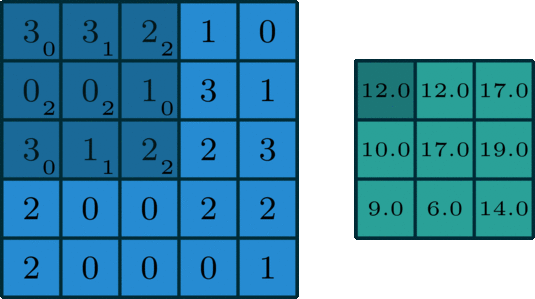

In [2]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
from IPython.display import Image
Image(filename="resources/conv_normal.gif")

- Divide el input (3D tensor) en parches y aplica una transformación (la misma en cada capa) a cada parche

- Output (3D tensor) es un mapa de features (cada una el resultado de aplicar la transformacion). Height x width x filtros. Cada capa es el resultado de aplicar un filtro a cada parche del input

- La convolución desliza cada parche sobre el input, parando en cada posible posicion y aplicando la transformacion (función kernel)

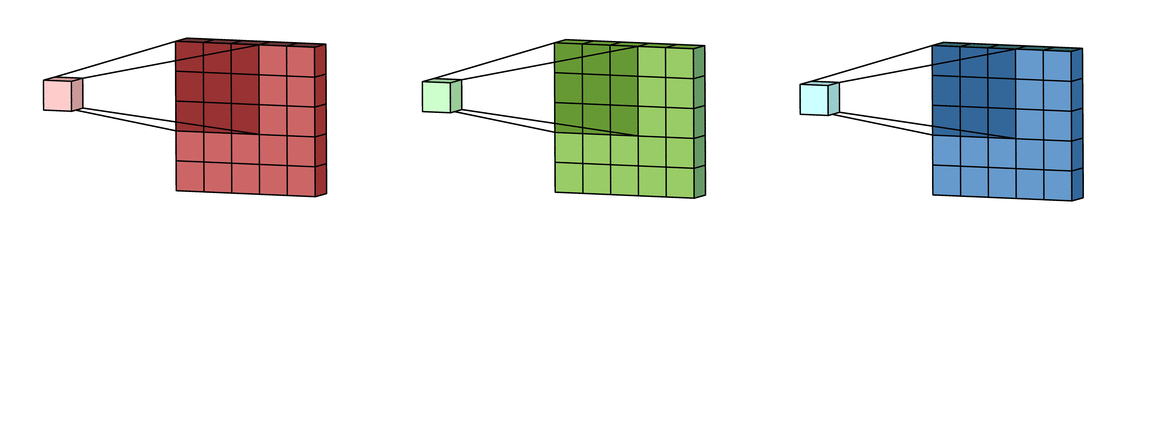

In [3]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="resources/conv_multichannel.gif")

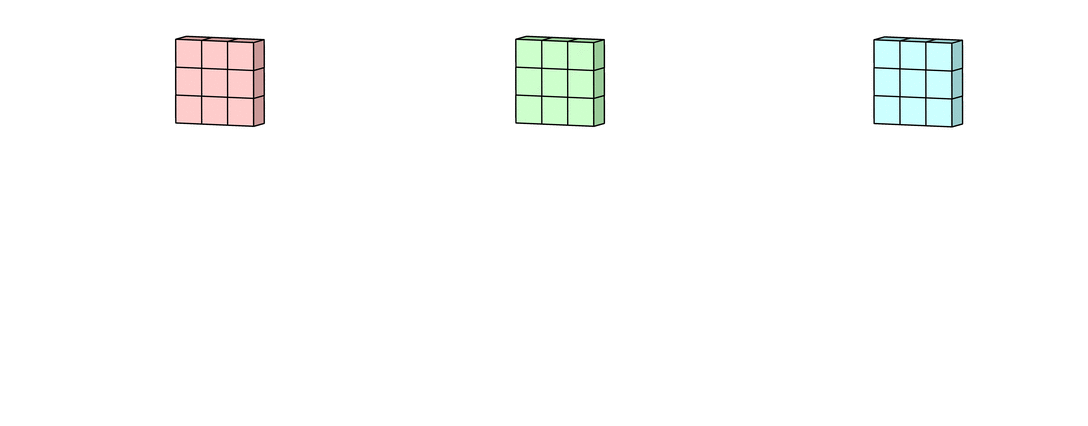

In [4]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="resources/conv_multichannel_2.gif")

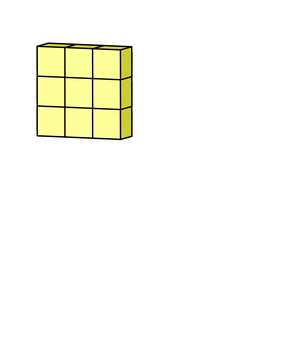

In [5]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="resources/bias_cnn.gif")

### Padding y striding
- Sólo hay 9 formas de aplicar un parche 3x3 a un imagen de 5x5
- Si se quiere aplicar a todos los pixeles --> padding (añadir filas y columnas para hacerlo posible)
```python
Conv2D(...,padding=<valor>): 'valid' sin padding, 'same' para igualar tamaño input y output feature 
```

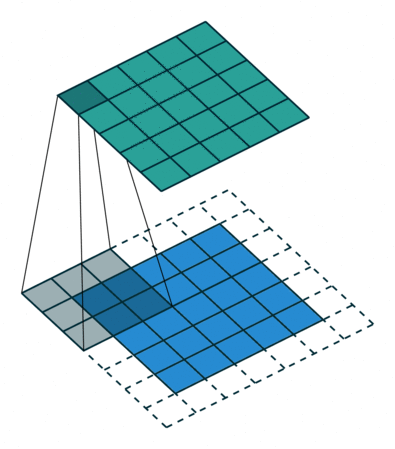

In [6]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="resources/conv_padding.gif")

- stride determina el salto entre ventana y ventana
- poco habitual (efecto downsample)
```python
Conv2D(...,stride=<valor>): int, salto entre ventanas 
```

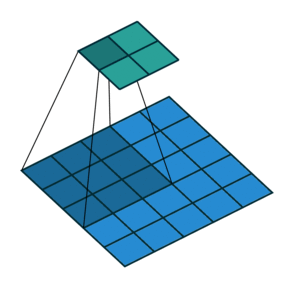

In [7]:
# Fuente: Shafkat, 2018. Acceso el 4 de Enero 2019. https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1
Image(filename="resources/conv_stride.gif")

### Pooling
- Se usan para hacer downsampling del input feature (reducir dimensionalidad)
- Similar a convoluciones, pero no aplican un kernel sino que aplican funcion 'max' (o average)
- Por defecto, tamaño 2x2 y stride 2


#### ¿Para qué?
- Reducir el numero de parámetros 
- permite a ventanas posteriores aceptar input de areas más grandes en capas anteriores (mejora percepción)

In [8]:
# red sin pooling

from keras import models
from keras import layers

convnet_nopooling = models.Sequential()
convnet_nopooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_nopooling.add(layers.Flatten())
convnet_nopooling.add(layers.Dense(512,activation='relu'))
convnet_nopooling.add(layers.Dense(10,activation='softmax'))

convnet_nopooling.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               18874880  
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [9]:
# Red con pooling
convnet_pooling = models.Sequential()
convnet_pooling.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_pooling.add(layers.MaxPooling2D((2,2)))
convnet_pooling.add(layers.Flatten())
convnet_pooling.add(layers.Dense(512,activation='relu'))
convnet_pooling.add(layers.Dense(10,activation='softmax'))

convnet_pooling.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

### Parámetros de CNN
- Tamaño de los parches (habitualmente 3x3 o 5x5)
- Depth (profundidad, número de filtros) del mapa de features del output (32 y 64 en el ejemplo)
```python
Conv2D(output_depth,(patch_height,patch_width))
```

## Entrenando CNNs
- Entrenar con pocos valores
- Data augmentation para ayudar overfitting
- CIFAR-10 imagenes http://www.cs.toronto.edu/~kriz/cifar.html


In [11]:
from keras.datasets import cifar10
import numpy as np

(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

In [12]:
train_data.shape

(50000, 32, 32, 3)

In [13]:
train_labels.shape

(50000, 1)

In [14]:
# seleccionar subset del total
samples_per_class = 300
number_of_classes = 10
train_data_subset = np.array([])
train_labels_subset = np.array([])
for i in range(number_of_classes):
    mask = np.where(train_labels == i)[0] # needed because train_labels has 2 dimensions
    if i == 0:
        train_data_subset = train_data[mask[:samples_per_class]]
        train_labels_subset = train_labels[mask[:samples_per_class]]
    else:
        train_data_subset = np.concatenate((train_data_subset,train_data[mask[:samples_per_class]]))
        train_labels_subset = np.concatenate((train_labels_subset,train_labels[mask[:samples_per_class]]))

In [15]:
train_data_subset.shape

(3000, 32, 32, 3)

In [16]:
train_labels_subset.shape

(3000, 1)

In [17]:
from keras.utils import to_categorical

# transformar los datos
x_train = train_data_subset.astype('float32')/255
x_test = test_data.astype('float32')/255

y_train = to_categorical(train_labels_subset)
y_test = to_categorical(test_labels)

In [18]:
from keras import models
from keras import layers

convnet = models.Sequential()
convnet.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet.add(layers.MaxPooling2D((2,2)))
convnet.add(layers.Flatten())
convnet.add(layers.Dense(512,activation='relu'))
convnet.add(layers.Dense(number_of_classes,activation='softmax'))

In [19]:
convnet.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

In [20]:
convnet.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [21]:
history = convnet.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))

Train on 3000 samples, validate on 10000 samples
Epoch 1/20
3000/3000 [==============================] - 14s 5ms/step - loss: 2.1911 - accuracy: 0.1853 - val_loss: 2.1575 - val_accuracy: 0.2178
Epoch 2/20
3000/3000 [==============================] - 20s 7ms/step - loss: 1.9192 - accuracy: 0.3100 - val_loss: 1.7561 - val_accuracy: 0.3602
Epoch 3/20
3000/3000 [==============================] - 19s 6ms/step - loss: 1.7724 - accuracy: 0.3503 - val_loss: 1.7247 - val_accuracy: 0.3755
Epoch 4/20
3000/3000 [==============================] - 20s 7ms/step - loss: 1.6205 - accuracy: 0.4267 - val_loss: 1.5573 - val_accuracy: 0.4364
Epoch 5/20
3000/3000 [==============================] - 20s 7ms/step - loss: 1.5377 - accuracy: 0.4373 - val_loss: 1.5941 - val_accuracy: 0.4242
Epoch 6/20
3000/3000 [==============================] - 22s 7ms/step - loss: 1.4418 - accuracy: 0.4883 - val_loss: 1.5760 - val_accuracy: 0.4370
Epoch 7/20
3000/3000 [==============================] - 19s 6ms/step - loss: 1.34

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

#plot accuracy
epochs = np.arange(1,len(history.history['accuracy'])+1)
plt.title('Normal model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history.history['accuracy'],'r',label='training accuracy')
plt.plot(epochs,history.history['val_accuracy'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

# Data augmentation
- Incrementar el número de ejemplos para evitar overfitting (junto con dropout)
- Generar datos a partir de los presentes, a través de transformaciones

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

sample = 266
plt.imshow(image.array_to_img(x_train[sample]))
plt.show()
print('Label {}'.format(y_train[sample]))

fig, axes = plt.subplots(2,2)
i = 0
for batch in datagen.flow(x_train[sample].reshape((1,32,32,3)),batch_size=1):
    #plt.figure(i)
    axes[i//2,i%2].imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break
plt.show()

In [ ]:
from keras import models
from keras import layers

convnet_augmentation = models.Sequential()
convnet_augmentation.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3),activation='relu'))
convnet_augmentation.add(layers.Conv2D(32,(3,3),activation='relu'))
convnet_augmentation.add(layers.MaxPooling2D((2,2)))
convnet_augmentation.add(layers.Dropout(0.25))
convnet_augmentation.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_augmentation.add(layers.Conv2D(64,(3,3),activation='relu'))
convnet_augmentation.add(layers.MaxPooling2D((2,2)))
convnet_augmentation.add(layers.Flatten())
convnet_augmentation.add(layers.Dropout(0.25))
convnet_augmentation.add(layers.Dense(512,activation='relu'))
convnet_augmentation.add(layers.Dropout(0.5))
convnet_augmentation.add(layers.Dense(number_of_classes,activation='softmax'))

In [ ]:
convnet_augmentation.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
### entrenar utilizando el generador de data
# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10

# Fit the model on the batches generated by datagen.flow().
history_augmentation = convnet_augmentation.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=10,
                            validation_data=(x_test, y_test),
                            workers=4,
                            steps_per_epoch=num_samples//batch_size)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#plot accuracy
epochs = np.arange(1,len(history_augmentation.history['accuracy'])+1)
plt.title('Model with data augmentation')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_augmentation.history['accuracy'],'r',label='training accuracy')
plt.plot(epochs,history_augmentation.history['val_accuracy'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

# guardar el modelo
convnet_augmentation.save('resources/convnet_augmentation.h5')

# Utilizando una red pre-entrenada

- Aunque no hayan sido entrenadas con las mismas clases target, han aprendido a distinguir features
- Puede reutilizarse en otra red
- Bueno cuando se tienen pocos datos

## Extraccion de features
- Red entrenada en ImageNet: animales, objetos, etc. 1.4 millones
- Utilizar la parte convolucional de una red entrenada en gran dataset
 - genérica


- la parte densa suele ser más especifica a las clases objetivo
- Fijar esa parte y entrenar solo la parte densa

In [ ]:
#keras incluye varias arquitecturas
# VGG16, VGG19, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, RasNet
# documentacion https://keras.io/applications/
# Visual Geometry Group 16 / 19 (numero de layers)
# 1 y 2 en la competicion ImageNet 2014
# kernels pequenyos de 3x3
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False, # incluir la parte densa (fully connected)
                 input_shape=(32,32,3))
conv_base.summary()

In [ ]:
# conectarlo a nueva parte densa
from keras import models
from keras import layers

conv_base.trainable = False # evitar que los pesos se modifiquen en la parte convolucional
pre_trained_model = models.Sequential()
pre_trained_model.add(conv_base)
pre_trained_model.add(layers.Flatten())
pre_trained_model.add(layers.Dense(256, activation='relu'))
pre_trained_model.add(layers.Dense(number_of_classes, activation='softmax'))

pre_trained_model.summary()

In [ ]:
# compilar el modelo
pre_trained_model.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

# data augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10, # grados de rotacion aleatoria
    width_shift_range=0.1, # fraccion del total (1) para mover la imagen
    height_shift_range=0.1, # fraccion del total (1) para mover la imagen
    shear_range=0, # deslizamiento
    zoom_range=0.1, # rango de zoom
    horizontal_flip=True, # girar las imagenes horizontalmente (eje vertical)
    fill_mode='nearest', # como rellenar posibles nuevos pixeles
    channel_shift_range=0.2 # cambios aleatorios en los canales de la imagen
)

In [ ]:
# entrenar utilizando el generador de data
datagen.fit(x_train)

# es necesario especificar el numero de steps cuando se usa un generator (para saber cuando dejar de generar datos en una epoca)
batch_size = 32
num_samples = x_train.shape[0] * 10

# Fit the model on the batches generated by datagen.flow().
history_pretrained = pre_trained_model.fit_generator(datagen.flow(x_train, y_train,batch_size=batch_size),
                            epochs=5,
                            validation_data=(x_test, y_test),
                            workers=4,
                            steps_per_epoch=num_samples//batch_size)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#plot accuracy
epochs = np.arange(1,len(history_pretrained.history['accuracy'])+1)
plt.title('Pre trained model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(epochs,history_pretrained.history['accuracy'],'r',label='training accuracy')
plt.plot(epochs,history_pretrained.history['val_accuracy'],'b',label='validation accuracy')
plt.legend(loc='best')
plt.show()

### Ejercicio: Alternativa liviana
- Entrenar esto en CPU es demasiado lento
- Ya que la parte CNN no es entrenable, se puede pasar una vez por imagen y grabar el output en una ndarray
 - utilizar como input de la parte entrenable estas ndarrays

# Visualizar CNN
- Como las features que aprenden las CNN son representaciones visuales, se pueden visualizar
- Tres formas
 - Visualizar activaciones intermedias
 - Visualizar filtros convolucionales
 - Visualizar heatmaps de las activaciones por clase

## Visualizar Activaciones intermedias
- Visualizar el output de las capas de la red
- 2D imagen por canal

In [ ]:
from keras.models import load_model
model_augmentation = load_model('resources/convnet_augmentation.h5')
model_augmentation.summary()

In [ ]:
# extraer outputs
from keras import models

output_layers = [layer.output for layer in model_augmentation.layers[:7]]
activation_model = models.Model(inputs=model_augmentation.input, outputs=output_layers)

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
%matplotlib inline

# imagen 
sample = 26
input_img = x_train[sample].reshape((1,32,32,3))
plt.imshow(image.array_to_img(x_train[sample]))
plt.show()

In [ ]:
# activacion, 32 canales, feature map de 30x30
layer = 4
activations = activation_model.predict(input_img)
layer_activation = activations[layer]
print(layer_activation.shape)

In [ ]:
# mostrar cualquier canal
channel = 29
plt.matshow(layer_activation[0,:,:,channel], cmap='jet')

In [ ]:
import numpy as np
# visualizar todas las capas
layer_names = [layer.name for layer in model_augmentation.layers[:7]]
images_per_row = 16
display_grid = []
for layer_name, layer_activation in zip(layer_names,activations):
    # numero de features
    n_features = layer_activation.shape[-1]
    # tamanyo de cada feature
    size = layer_activation.shape[1]
    # numero de columnas a mostrar
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_img = layer_activation[0,:,:,col * images_per_row + row]
            display_grid[col * size : (col + 1) * size,
                        row * size : (row + 1) * size] = channel_img
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                       scale * display_grid.shape[0]))
    plt.title('Activacion de las capas')
    plt.grid(False)
    plt.imshow(display_grid,aspect='auto',cmap='jet')


### Interpretacion
- Capas iniciales son como detectores de bordes
- Capas más profundas son maas difíciles de interpretar (abstractas) y tienen info relativa a la clase de imagen
- La activación de capas profundas es más dispersa (sparse)

## Visualizando filtros convolucionales
- Visualizar las imágenes que maximizan la respuesta a un filtro

In [ ]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet',include_top=False)
model.summary()

In [ ]:
import numpy as np

def gen_max_response_pattern(layer_name, filter_index, size=32):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:,:,:,filter_index])
    
    # para obtener el patron que responde de forma maxima, utilizamos descenso del gradiente
    grads = K.gradients(loss,model.input)[0] # seleccionar el primero, ya que esto devuelve una lista
    # normalizacion para ayudar al proceso del gradiente
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # ultima constante para evitar dividir por 0
    # definir funcion que calcula la perdida y el gradiente de la imagen
    iterate = K.function([model.input], [loss,grads])
    loss_value, grads_value = iterate([np.zeros((1,size,size,3))])
    
    # iniciamos con imagen aleatoria
    input_img_data = np.random.random((1,size,size,3)) * 20 + 128

    step = 1. # magnitud de cada actualizacion en el gradiente
    n_steps = 40 # numero de iteraciones
    for i in range(n_steps):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    # procesar la imagen resultante
    img -= img.mean()
    img /= img.std() + 1e-5
    img *= 0.1
    img += 0.5
    img = np.clip(img,0,1)
    img *= 255
    img = np.clip(img,0,255).astype('uint8')
    
    return img

In [ ]:
# mostrar un patron para un filtro
import matplotlib.pyplot as plt
%matplotlib inline

layer_name = 'block3_conv1'
filter_index = 0 # canal a estudiar

img = gen_max_response_pattern(layer_name,filter_index,32)
plt.imshow(img)

### Ejercicio
Mostrar los patrones de maxima activacion para todos los filtros de una capa

## Visualización de heatmaps de activacion por clase
- Útil para averiguar qué partes de la imagen contribuyen más a la decisión
- Interesante para saber qué pasa cuando se cometen errores

In [ ]:
# tecnica utiliza gradientes Ramprasaath, R. Selvaraju et al. (2017). https://arxiv.org/abs/1610.02391
from keras.applications import VGG16

model = VGG16(weights='imagenet',include_top=True)

In [ ]:
from keras.preprocessing import image 
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# cargar imagen de perro
img = image.load_img('resources/cat.jpg', target_size=(224,224))
x = image.img_to_array(img) # a array de (224,224,3)
x = np.expand_dims(x, axis=0) # a array de (1,224,224,3)
x = preprocess_input(x)

In [ ]:
# testeando el output
prediction = model.predict(x)
print(decode_predictions(prediction))

In [ ]:
egyptiancat_output_index = np.argmax(prediction[0])
egyptiancat_output = model.output[:,egyptiancat_output_index]
last_conv_layer = model.get_layer('block5_conv3')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

grads = K.gradients(egyptiancat_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0,1,2))
iterate = K.function( [model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])

# multiplicar cada canal en el feature map por como de importante el canal es con respecto a la clase "tabby"
for i in range(512):
    conv_layer_output_value[:,:,i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

# visualizar
heatmap = np.maximum(heatmap,0)
heatmap /= np.max(heatmap)
fig,axes = plt.subplots(1,2)
axes[0].matshow(heatmap)
axes[1].imshow(img)
plt.show()

### Ejercicio
Obtener el heatmap para las otras clases en la lista de prediccion (Egyptian_cat, tiger_cat, etc.)